<a href="https://colab.research.google.com/github/Salciano/ShowcasePython/blob/main/Showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a brief showcase, displaying the skills I developed in Python and its libraries.

In [ ]:
#@title Algebraic Operators > Python
print("Arithmetic/Algebraic Operators") # Operators are things/token/symbols that act/operate on other things/operands

a, b = 10, 5
print(f"{a} + {b} = {a + b}      > Addition")
print(f"{a} - {b} = {a - b}       > Subtraction")
print(f"{a} * {b} = {a * b}      > Multiplication")
print(f"{a} / {b} = {a / b}     > Division (Float)")

print()
time1, clock12 = 18, 12
runtime1, clock24 = 100, 24
print(f"{a} ** {b} = {a ** b} > Exponentiation (10 to the power of 5) or (10*10*10*10*10) or (10^5)")
print(f"{a} // {b} = {a // b}      > Floor Division (the number a times a number fits tidly into another)")
print(f"{a} % {b} = {a % b}       > Modulus (remainder or difference after dividing 10 by 5)")

print("\nPractical Uses")
print("Floor division can be useful for counting time.")
print(f"For example, let's say, I have been playing a game for {runtime1} hours. Using this operator, it is possible to calculate that I have been playing the game for {runtime1 // clock24} days (and {runtime1 - (clock24*(runtime1 // clock24))} hours). {runtime1} // {clock24} = {runtime1 // clock24}. Maybe I should take a break :)")
print(f"Another example, let's say, I have been training Calisthenics for 45 days and each month has 30 days. Then, I have been training for {45 // 30} month(s).")
print(f"Lastly, let's say, I have been training martial arts for 200 months and each year has 12 months. Then, I have been training for {200 // 12} year(s). Pretty long time!")

print("\nModulus is also useful for counting time. Namely for clocks, which wrap around every 12 or 24 hours (12am vs 12pm vs 24h).")
print(f"For example, let's say, it is 18:00 on a {clock24} hour clock. On an {clock12} hour clock, it is {time1 % clock12}pm. {time1} % {clock12} = {time1 % clock12}")


Arithmetic/Algebraic Operators
10 + 5 = 15      > Addition
10 - 5 = 5       > Subtraction
10 * 5 = 50      > Multiplication
10 / 5 = 2.0     > Division (Float)

10 ** 5 = 100000 > Exponentiation (10 to the power of 5) or (10*10*10*10*10) or (10^5)
10 // 5 = 2      > Floor Division (the number a times a number fits tidly into another)
10 % 5 = 0       > Modulus (remainder or difference after dividing 10 by 5)

Practical Uses
Floor division can be useful for counting time.
For example, let's say, I have been playing a game for 100 hours. Using this operator, it is possible to calculate that I have been playing the game for 4 days (and 4 hours). 100 // 24 = 4. Maybe I should take a break :)
Another example, let's say, I have been training Calisthenics for 45 days and each month has 30 days. Then, I have been training for 1 month(s).
Lastly, let's say, I have been training martial arts for 200 months and each year has 12 months. Then, I have been training for 16 year(s). Pretty long time!


In [ ]:
#@title Rounding > Python

# Python has a round() function that rounds numbers.
print(round(1,123456789))

# It is possible to round a number to a specific decimal place/digit.
print(round(1.123456789, 5)) # In this case, it rounded to 5 decimal digits, the 5th decimal place.

print("\u2500" * 50)
# Python rounds even numbers down and odd numbers up
print("Unrounded Numbers ≈ Rounded Numbers")


i = 1.5
while i < 11:
    print( i, "≈", round(i), "\t|", i+10, "≈", round(i+10))
    i += 1

print("\u2500" * 50)
print("Usually (not always), Python automatically assigns data types according to the result. Values inside arrays (NumPy library) may remain floats.")
print("For example: whole numbers are assigned as integers; while decimal numbers are assigned as floats.")
print("This even converts already existing data to different data types.")

print("\nRounding may change data type! Let's round 2.55 and see what happens:")
x = round(2.55)
print("x = round(2.55) ≈", x, type(x), "Python stored the rounded number as an integer data type.")
x = round(2.55, 1)
print("x = round(2.55, 1) ≈", x, type(x), "Python converted the rounded number into a float, which was previously an integer.")
x = round(2.55)
print("x = round(2.55) ≈", x, type(x), "Python converted the rounded float back into an integer.")
print("This was done using the same variable and without declaring it or its data type, in the first place.")
print("So, in Python, you don't need to declare variables. Also, variables can change its data type after creation and being assigned a data type.")

print("\nThis even works without variables. Let's round 2.55 without storing it in a variable and see what happens:")
print("round(2.55) ≈", round(2.55), type(round(2.55)), "Python stored the rounded number as an integer data type.")
print("round(2.55, 1) ≈", round(2.55, 1), type(round(2.55, 1)), "Python converted the rounded number into a float, which was previously an integer.")
print("round(2.55) ≈", round(2.55), type(round(2.55)), "Python converted the rounded float back into an integer.")

print("\u2500" * 50)
# Here is how to round lists
listy = [ 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5 ]
print("Let's try printing a list. Note the square brackets, when printing lists without formatting.")
print(listy)
roundylisty = [ round(i) for i in listy ]

print("\nThis is how a rounded list looks like. Note the square brackets, when printing lists without formatting.")
print(roundylisty)
# print(round(listy)) This would not work. You need to round each element individually.

print("\nLet's try printing a tupple. Note the round brackets, when printing lists without formatting.")
listy = ( 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5 )
print(listy)
#roundylisty = ( round(i) for i in listy ) # tuples are immutable. So we can't round it after values have been assigned to it.

print("\nThis is how a rounded tupple looks like. Note the square brackets, when printing lists without formatting.")
print(roundylisty)

print("\nLet's try printing a set.")
listy = { 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5 }
print(listy)
print("Note the curl brackets, when printing lists without formatting.")

print("\nThis is how a rounded set looks like.")
roundylisty = { round(i) for i in listy }
print(roundylisty)
print("Note the curly brackets, when printing lists without formatting.")
print("More importantly, note that there was data loss or data cleaning, because data sets are unique and cannot have duplicate values. Be very careful when rounding sets!")

print("\nIn conclusion, data types were changed. Even for the tupple. Only the values themselves are immutable, but the data type of the structure itself can be changed.")

1
1.12346
──────────────────────────────────────────────────
Unrounded Numbers ≈ Rounded Numbers
1.5 ≈ 2 	| 11.5 ≈ 12
2.5 ≈ 2 	| 12.5 ≈ 12
3.5 ≈ 4 	| 13.5 ≈ 14
4.5 ≈ 4 	| 14.5 ≈ 14
5.5 ≈ 6 	| 15.5 ≈ 16
6.5 ≈ 6 	| 16.5 ≈ 16
7.5 ≈ 8 	| 17.5 ≈ 18
8.5 ≈ 8 	| 18.5 ≈ 18
9.5 ≈ 10 	| 19.5 ≈ 20
10.5 ≈ 10 	| 20.5 ≈ 20
──────────────────────────────────────────────────
Usually (not always), Python automatically assigns data types according to the result. Values inside arrays (NumPy library) may remain floats.
For example: whole numbers are assigned as integers; while decimal numbers are assigned as floats.
This even converts already existing data to different data types.

Rounding may change data type! Let's round 2.55 and see what happens:
x = round(2.55) ≈ 3 <class 'int'> Python stored the rounded number as an integer data type.
x = round(2.55, 1) ≈ 2.5 <class 'float'> Python converted the rounded number into a float, which was previously an integer.
x = round(2.55) ≈ 3 <class 'int'> Python con

In [ ]:
#@title Rounding > NumPy, Math

# It is also possible to use libraries, like NumPy or Math. Although math lacks math.round()

import numpy as np
import math

array = np.array([[1.5,2.5,3.5,4.5,5.5], [6.5,7.5,8.5,9.5,10.5]])

print("You'd like me to round these numbers?")
print(array)
print("I'm very odd at rounding numbers, but lemme try! Even numbers are oddly rounded down. Odd numbers are normally rounded up. Is this right?")
print(np.round(array))
print("Note the rounded data type inside the array is still float, despite looking like integers: type(np.round(array[0,0])) =", type(np.round(array[0,0])))

#print(round(array)) does not work in native Python. That is one reason to use numpy.

# Additionally, you can also truncate in Numpy. Note that numpy returns floats
print("\nNumpy: Untruncated Numbers ≈ Truncated Numbers (numpy.trunc)")
i = 1.5
while i < 6:
  print(i, end = " ≈ ")
  print(np.trunc(i), type(np.trunc(i)))
  i += 1
print()

# Additionally, you can also truncate in Math. Note that math returns integers
print("Math: Untruncated Numbers ≈ Truncated Numbers (math.trunc)")
i = 1.5
while i < 6:
  print(i, end = " ≈ ")
  print(math.trunc(i), type(math.trunc(i)))
  i += 1
print()

# Furthermore, it is possible to round down or up.
print("Math: Unfloored Numbers ≈ Floored (Rounded Down) Numbers (math.floor)")
i = 1.5
while i < 6:
  print(i, end = " ≈ ")
  print(math.floor(i))
  i += 1
print()

print("Math: Unceiled Numbers ≈ Ceiled (Rounded Up) Numbers (math.ceil)")
i = 1.5
while i < 11:
  print(f"{i} ≈ {math.ceil(i):02d}\t| {i+1} ≈ {math.ceil(i+1):02d}")
  i += 2


You'd like me to round these numbers?
[[ 1.5  2.5  3.5  4.5  5.5]
 [ 6.5  7.5  8.5  9.5 10.5]]
I'm very odd at rounding numbers, but lemme try! Even numbers are oddly rounded down. Odd numbers are normally rounded up. Is this right?
[[ 2.  2.  4.  4.  6.]
 [ 6.  8.  8. 10. 10.]]
Note the rounded data type inside the array is still float, despite looking like integers: type(np.round(array[0,0])) = <class 'numpy.float64'>

Numpy: Untruncated Numbers ≈ Truncated Numbers (numpy.trunc)
1.5 ≈ 1.0 <class 'numpy.float64'>
2.5 ≈ 2.0 <class 'numpy.float64'>
3.5 ≈ 3.0 <class 'numpy.float64'>
4.5 ≈ 4.0 <class 'numpy.float64'>
5.5 ≈ 5.0 <class 'numpy.float64'>

Math: Untruncated Numbers ≈ Truncated Numbers (math.trunc)
1.5 ≈ 1 <class 'int'>
2.5 ≈ 2 <class 'int'>
3.5 ≈ 3 <class 'int'>
4.5 ≈ 4 <class 'int'>
5.5 ≈ 5 <class 'int'>

Math: Unfloored Numbers ≈ Floored (Rounded Down) Numbers (math.floor)
1.5 ≈ 1
2.5 ≈ 2
3.5 ≈ 3
4.5 ≈ 4
5.5 ≈ 5

Math: Unceiled Numbers ≈ Ceiled (Rounded Up) Numbers (math.cei

In [ ]:
#@title Geometric Functions > NumPy, Math
#import numpy as np # for learning purposes I wont give numpy the np alias
import numpy
import math

print("Even though Python lacks the constant π (pi), there are Python libraries that include it, like NumPy or Math.")
print("In numpy, it stored as numpy.pi.  π =", numpy.pi, type(numpy.pi))
print("In math, it is stored as math.pi. π =", math.pi, type(math.pi))
# print("Native has no π :(", pi)

print("\nPi is useful to calculate things, like a circle's radius, diameter, circumference.")

# Radius
print("\nTo calculate the radius:")
circumference = 5 # Lets say we have a circle with 5cm circumference.
print(f"Numpy: A circle with a circumference of {circumference} cm has a radius of: {circumference / (2 * numpy.pi)} cm. (circumference / (2 * numpy.pi))")
print(f" Math: A circle with a circumference of {circumference} cm has a radius of: {circumference / (2 * math.pi)} cm. (circumference / (2 * math.pi))")

# Diameter
print("\nTo calculate the diameter:")
circumference = 5 # Lets say we have a circle with 5cm circumference, again. Might want to change value, later.
print(f"Numpy: A circle with a circumference of {circumference} cm has a diameter of: {circumference / numpy.pi} cm. (perimeter / numpy.pi)")
print(f" Math: A circle with a circumference of {circumference} cm has a diameter of: {circumference / math.pi} cm. (perimeter / math.pi)")

# Circumference/Perimeter
print("\nTo calculate the circumference or perimeter of a circle:")
radius = 5 # Lets say we have a circle with 5cm radius.
print(f"Numpy: A circle with a radius of {radius} cm has a circumference of: {2 * numpy.pi * radius} cm. (2 * numpy.pi * radius)")
print(f" Math: A circle with a radius of {radius} cm has a circumference of: {2 * numpy.pi * radius} cm. (2 * math.pi * radius)")

# Area
print("\nTo calculate the area:")
radius = 5 # Lets say we have a circle with 5cm radius, again. Might want to change value, later
area = math.pi * radius ** 2

print( "Numpy: A circle with a radius of", radius, "cm has an area of:", area, "cm2.")
area = np.pi * radius ** 2
print( " Math: A circle with a radius of", radius, "cm has an area of:", area, "cm2.")

print()
# To calculate the area of several circles in an array/list
radii = np.array([1,2,3,4,5])
print("Here we have", len(radii), "circles. Each with a radius of:")
# print(radii) # with brackets
#print(*radii, sep="cm, ", end = "cm") # without brackets
for i in range(len(radii)):
    print(f"Circle {i+1}: {radii[i]} cm.")

print("\nHere is the calculated area for each circle:")
area = np.pi * radii ** 2
#print(np.pi * radii ** 2 ) # Result in ugly brackets and without using area variable
#print(*area, sep = ", ") # Result separated by commas in a single line

for i in range(len(radii)):
    print(f"Circle {i+1}> Radius: {radii[i]} cm. Area: {area[i]} cm2")


Even though Python lacks the constant π (pi), there are Python libraries that include it, like NumPy or Math.
In numpy, it stored as numpy.pi.  π = 3.141592653589793 <class 'float'>
In math, it is stored as math.pi. π = 3.141592653589793 <class 'float'>

Pi is useful to calculate things, like a circle's radius, diameter, circumference.

To calculate the radius:
Numpy: A circle with a circumference of 5 cm has a radius of: 0.7957747154594768 cm. (circumference / (2 * numpy.pi))
 Math: A circle with a circumference of 5 cm has a radius of: 0.7957747154594768 cm. (circumference / (2 * math.pi))

To calculate the diameter:
Numpy: A circle with a circumference of 5 cm has a diameter of: 1.5915494309189535 cm. (perimeter / numpy.pi)
 Math: A circle with a circumference of 5 cm has a diameter of: 1.5915494309189535 cm. (perimeter / math.pi)

To calculate the circumference or perimeter of a circle:
Numpy: A circle with a radius of 5 cm has a circumference of: 31.41592653589793 cm. (2 * numpy.p

In [ ]:
#@title Slicing > NumPy
import numpy as np

# leading zeroes dont work, but you can ident, somehow. wasn't identation important in py?
# square brackets are printed... To remove them, unpack with "*" or convert to string. reconvert if needed...
arry = np.array([
    [  1,  2,  3,  4],
     [ 5,  6,  7,  8],
      [9, 10, 11, 12]])

print("Hello! Meet arry. Arry is an array that looks like this:")
print(arry)
print(f"{type(arry)} <shape/dimenions: {arry.shape}>")
print("\nWe can slice arry, like a cake, using: variable[y1:y2, x1:x2, step].")
print("\nSlicing first 2 rows and columns > arry[0:2, 0:2]:")
print(arry[0:2, 0:2]) # slice and dice
print("\nSlicing last 2 rows and colums > arry[1:3, 2:4]:")
print(arry[1:3, 2:4]) # slice and dice


Hello! Meet arry. Arry is an array that looks like this:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
<class 'numpy.ndarray'> <shape/dimenions: (3, 4)>

We can slice arry, like a cake, using: variable[y1:y2, x1:x2, step].

Slicing first 2 rows and columns > arry[0:2, 0:2]:
[[1 2]
 [5 6]]

Slicing last 2 rows and colums > arry[1:3, 2:4]:
[[ 7  8]
 [11 12]]


In [ ]:
#@title Transposition > NumPy > Libs + Vars

import numpy as np

# make a simpler transposition articke and move this to NumPy N-Dimensional Arrays
print("In NumPy, you can create scalars, vectors, matrices and tensors as n-dimendional arrays (class type ndarray), up to 32 dimensions.")

print("\nHere we have 4 variables: scalar2, vector2, matrix2, tensor2.")

scalar2 = np.array( 1 )
print("\n1. scalar2:")
print(scalar2)
print(f"{type(scalar2)}. Dimensions: {scalar2.ndim}. Shape: {scalar2.shape}") #todo copy this onto others!

vector2 = np.array([1, 2, 3, 4])
print("\n2. vector2:")
print(vector2)
print(type(vector2), vector2.shape)

matrix2 = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8]])
print("\n3. matrix2:")
print(matrix2)
print(type(matrix2), matrix2.shape)

tensor2 = np.array([
    [[1,2,3,4],
     [5,6,7,8]],

    [[9,10,11,12],
     [13,14,15,16]]])
print("\n4. tensor2:")
print(tensor2)
print(type(tensor2), tensor2.shape)

In NumPy, you can create scalars, vectors, matrices and tensors as n-dimendional arrays (class type ndarray), up to 32 dimensions.

Here we have 4 variables: scalar2, vector2, matrix2, tensor2.

1. scalar2:
1
<class 'numpy.ndarray'>. Dimensions: 0. Shape: ()

2. vector2:
[1 2 3 4]
<class 'numpy.ndarray'> (4,)

3. matrix2:
[[1 2 3 4]
 [5 6 7 8]]
<class 'numpy.ndarray'> (2, 4)

4. tensor2:
[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]]
<class 'numpy.ndarray'> (2, 2, 4)


In [ ]:
#@title Transposition > NumPy > Vectors

print("\nIn NumPy, transposing a vector results in the same vector.")
print("As we can see, it does not transpose a row vector into a column vector or vice-versa.")
print("Untransposed vector2:" , vector2)
print("vector2.T):", np.transpose(vector2))
print("np.transpose(vector2):", np.transpose(vector2))

print("\nThere are different ways to go around this.")

print("The simplest one is to create the vector, as a 2D array, instead of a 1D Array:")
print("So, instead of:", vector2)
vector2 = np.array([ [1, 2, 3, 4]]) # instead of vector2 = np.array ([1, 2, 3, 4])
print("Insert extra brackets:", vector2)

print("\nAfter gaving it an extra dimension, it can be transposed:")
print("vector2.T:"), print(vector2.T)
print("np.transpose(vector2):"), print(np.transpose(vector2))

vector2 = np.array([1,2,3,4]) # restore vector2

print("\nOther ways to reshape vector2 into a column vector:")
print("vector2[:, None]"), print(vector2[:, None])
print(vector2[:, None].shape)
print("\nvector2.reshape(-1,1)"), print(vector2.reshape(-1, 1))
print(vector2.reshape(-1, 1).shape)
print("\nvector2[:, np.newaxis:"), print(vector2[:, np.newaxis], vector2[:, np.newaxis].shape)

print("However, these transforms the 1D (1-dimensional) array into a 2D array, as well:")

print("\nAlso, repeating vector2[:2, None] twice does not transpose it back into a 1D array. Instead, it turns it into a 3D array.")
vector2 = vector2[:, None]
print(vector2[:, None])
print(vector2[:, None].shape, type(vector2))

print("\nLets see what happens, if we transpose vector2, now.")
print("2D vector2:")
print(vector2)
print(vector2.shape)

print("\nvector2.T:")
print(vector2.T)
print(vector2.T.shape)

vector2 = np.array([1, 2, 3, 4]) # restore vector2

print("\nNow, lets refer to our 2D matrix2...")
print("2D matrix2")
print(matrix2)
print(matrix2.shape)
print("\nTrying this with on matrix2, also turns it into a 3D array:")
print("matrix2[:, None]")
print(matrix2[:, None])
print(matrix2[:, None].shape)



In NumPy, transposing a vector results in the same vector.
As we can see, it does not transpose a row vector into a column vector or vice-versa.
Untransposed vector2: [1 2 3 4]
vector2.T): [1 2 3 4]
np.transpose(vector2): [1 2 3 4]

There are different ways to go around this.
The simplest one is to create the vector, as a 2D array, instead of a 1D Array:
So, instead of: [1 2 3 4]
Insert extra brackets: [[1 2 3 4]]

After gaving it an extra dimension, it can be transposed:
vector2.T:
[[1]
 [2]
 [3]
 [4]]
np.transpose(vector2):
[[1]
 [2]
 [3]
 [4]]

Other ways to reshape vector2 into a column vector:
vector2[:, None]
[[1]
 [2]
 [3]
 [4]]
(4, 1)

vector2.reshape(-1,1)
[[1]
 [2]
 [3]
 [4]]
(4, 1)

vector2[:, np.newaxis:
[[1]
 [2]
 [3]
 [4]] (4, 1)
However, these transforms the 1D (1-dimensional) array into a 2D array, as well:

Also, repeating vector2[:2, None] twice does not transpose it back into a 1D array. Instead, it turns it into a 3D array.
[[[1]]

 [[2]]

 [[3]]

 [[4]]]
(4, 1, 1)

In [ ]:
#@title Transposition > NumPy > Matrices, Tensors...

print("\nIn NumPy, we can transpose matrices and tensors. For example, matrix2 can be transposed, using matrix2.T or numpy.transpose(matrix2)")

#matrix2 = matrix2.T
print("\nHere is matrix2 transposed (matrix2.T):")
print(matrix2.T)

#matrix2 = matrix2.T.T
print("\nHere is matrix2 transposed back (matrix2.T.T):")
print(matrix2.T.T)

# matrix2 = np.transpose(matrix2)
print("\nHere is matrix2 transposed with np.transpose(matrix2):")
print(np.transpose(matrix2))

# Transposing tensors
print("\nHere is tensor2 transposed (tensor2.T):")
print(tensor2.T)
print(tensor2.T.shape)



In NumPy, we can transpose matrices and tensors. For example, matrix2 can be transposed, using matrix2.T or numpy.transpose(matrix2)

Here is matrix2 transposed (matrix2.T):
[[1 5]
 [2 6]
 [3 7]
 [4 8]]

Here is matrix2 transposed back (matrix2.T.T):
[[1 2 3 4]
 [5 6 7 8]]

Here is matrix2 transposed with np.transpose(matrix2):
[[1 5]
 [2 6]
 [3 7]
 [4 8]]

Here is tensor2 transposed (tensor2.T):
[[[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]

 [[ 4 12]
  [ 8 16]]]
(4, 2, 2)


In [ ]:
#@title Transposition > PyTorch > Libs + Vars

import torch

print("In PyTorch, scalars, vectors and matrices belong to the class tensor.")

scalar3 = torch.tensor([1])
print("\n1. scalar3:")
print(scalar3)
print(type(scalar3), scalar3.shape)

vector3 = torch.tensor([ 1,2,3,4 ])
print("\n2. vector3:")
print(vector3)
print(type(vector3), vector3.shape)

matrix3 = torch.tensor([
    [1,2,3,4],
    [5,6,7,8]])

print("\n3. matrix3:")
print(matrix3)
print(type(matrix3), matrix3.shape)

tensor3 = torch.tensor([
    [[1,2,3,4],
     [5,6,7,8]],

    [[9,10,11,12],
     [13,14,15,16]]])
print("\n4. tensor3:")
print(tensor3)
print(type(tensor3), tensor3.shape)


In PyTorch, scalars, vectors and matrices belong to the class tensor.

1. scalar3:
tensor([1])
<class 'torch.Tensor'> torch.Size([1])

2. vector3:
tensor([1, 2, 3, 4])
<class 'torch.Tensor'> torch.Size([4])

3. matrix3:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
<class 'torch.Tensor'> torch.Size([2, 4])

4. tensor3:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[ 9, 10, 11, 12],
         [13, 14, 15, 16]]])
<class 'torch.Tensor'> torch.Size([2, 2, 4])


In [ ]:
#@title Transposition > Pytorch

print("\nTransposing 1D tensors doesn't really do anything...")
vector3 = torch.tensor([ 1,2,3,4 ])
print("Untransposed:",vector3)
print("Transposed",vector3.T)

#print(type(vector3.T), vector3.T.size())
print("\nFor this reason, we should create the vector as a 2D tensor from the start or reshape it, afterwards.")
print("So instead of this:")
print("vector3 = torch.tensor([ 1,2,3,4 ])", type(vector3), vector3.size())

print("We could type this:")
print("vector3 = torch.tensor([[ 1,2,3,4 ]])",type(vector3), vector3.size())
vector3 = torch.tensor([[ 1,2,3,4 ]]) # Instead of vector3 = torch.tensor([ 1,2,3,4 ])
print("Note the extra pair of brackets.")

print("\nNow, it can be transposed (vector3.T)")
print(vector3.T)
print(type(vector3.T), vector3.T.size())
vector3 = torch.tensor([ 1,2,3,4 ]) # reset vector3

print("\nAnother way, is to reshape it like this:")
print("vector3 = vector3.reshape(1,4)")
vector3 = vector3.reshape(1,4)
print(vector3)
print("Note the extra set of brackets.")

vector3 = torch.tensor([ 1,2,3,4 ]) # reset vector3

print("\n...or reshape it like this:")
print("vector3 = vector3.reshape(-1,4)")
vector3 = vector3.reshape(-1,4)
print(vector3)
print("Note the extra set of brackets.")
print("\nNow, it can be transposed (vector3.T)")
print(vector3.T)
#print("In this case, you could also reshape from a row vector straight into a column vector (vector3.reshape(4,1))")
#print(vector3.reshape(4,1))
#print("As you can see, it looks as if it had been transposed.")
#print("However, this is a different operation and wont work with matrices or tensors...")

print("\nUsing .reshape you can even revert it back into a 1D tensor (vector3.reshape(-1))")
vector3 = torch.tensor([[ 1,2,3,4 ]]) # Instead of vector3 = torch.tensor([ 1,2,3,4 ])
print(vector3.reshape(-1))
print(type(vector3.reshape(-1)), vector3.reshape(-1).size())

print("\nOn to algebraic matrices and tensors...")
print("\nHere is matrix3, a matrix or 2D tensor:")
print(matrix3)
print("\nLet's transpose it (matrix3.T)")
print(matrix3.T)
print(type(matrix3.T), matrix3.T.size())

print("\nHere is tensor3, a 3D tensor:")
print(tensor3)
print("\nNow, let's transpose it (tensor3.T)")
print(tensor3.T)
print(type(tensor3.T), tensor3.T.size())



Transposing 1D tensors doesn't really do anything...
Untransposed: tensor([1, 2, 3, 4])
Transposed tensor([1, 2, 3, 4])

For this reason, we should create the vector as a 2D tensor from the start or reshape it, afterwards.
So instead of this:
vector3 = torch.tensor([ 1,2,3,4 ]) <class 'torch.Tensor'> torch.Size([4])
We could type this:
vector3 = torch.tensor([[ 1,2,3,4 ]]) <class 'torch.Tensor'> torch.Size([4])
Note the extra pair of brackets.

Now, it can be transposed (vector3.T)
tensor([[1],
        [2],
        [3],
        [4]])
<class 'torch.Tensor'> torch.Size([4, 1])

Another way, is to reshape it like this:
vector3 = vector3.reshape(1,4)
tensor([[1, 2, 3, 4]])
Note the extra set of brackets.

...or reshape it like this:
vector3 = vector3.reshape(-1,4)
tensor([[1, 2, 3, 4]])
Note the extra set of brackets.

Now, it can be transposed (vector3.T)
tensor([[1],
        [2],
        [3],
        [4]])

Using .reshape you can even revert it back into a 1D tensor (vector3.reshape(-1)

In [ ]:
#@title Dot Product > NumPy

import numpy as np

# Dot product is an operation that multiplies 2 series of numbers and then sums the result of those multiplications into a single number.
# In other words, it is the sum of the products (multiplications) of two series or sequences of numbers.

# move to last: 20.10.2025. Note that np.dot() only multiplies the arrays. It does not sum them to return a single number. This could be due to bad implementation.

# This operation requires that the sequences have the same lenght or dimensions.
# Typically, these sequences or series of numbers are vectors, matrices, tensors and such.

# move these 2 to implementation...
# Dot product may be used to reflect the commonalities between two objects, to tell how close/similar or how far/distinct things are from each other.
# Dot product can be applied in artificial neural networks as a weighted preferencial inputs.

#npvector1 = np.array([1,2,3,4])
#npvector2 = np.array([0,1,0,-1])
npvector3 = np.array([[1,2,3,4,5,6],[4,5,6,7,8,9], [7,8,9,10,11,12]])

npvector1 = np.array([[1,2,3],[4,5,6],[7,8,9]])

npvector2 = np.array([[1,2,3],[4,5,6],[7,8,9]])

# Calculating the dot product via function np.dot(a,b) multiplies the arrays.
# On 1D vectors, it sums the product.
# On higher dimensions than vectors, it does not sum the product.

print("Calculation via function np.dot(a,b)")
print(np.dot(npvector1,npvector2))

# Dot Product via calculation
# Order/Method of multiplication: 1*1 + 2*2 + 3*3 + 4*4+ 5*5 + 6*6 + 7*7 + 8*8 + 9*9 = 285
print("\nCalculation via np.sum(a*b)")
print(np.sum(npvector1*npvector2))
# Order/Method of multiplication: rows by columns
# 1*1 + 2*4 + 3*7
# 4*1 + 5*4 + 6*7
# 7*1 + 8*4 + 9*7

# 1*2 + 2*5 + 3*8
# 4*2 + 5*5 + 6*8
# 7*2 + 8*5 + 9*8

# 1*3 + 2*6 + 3*9
# 4*3 + 5*6 + 6*9
# 7*3 + 8*6 + 9*9

print("\nCalculation via np.sum(a@b)")
print(np.sum(npvector1@npvector2))
# Slicing works and allows calculating objects with different sizes or shapes as if they had the same size and shape.
print("\nSlicing and calculating via np.sum(a*b)")
print(np.sum(npvector3[:3,:3] * npvector2[:3,:3] ))


Calculation via function np.dot(a,b)
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]

Calculation via np.sum(a*b)
285

Calculation via np.sum(a@b)
729

Slicing and calculating via np.sum(a*b)
285


In [ ]:
#@title Dot Product > PyTorch

import torch

tensor1 = torch.tensor([1,2,3,4,5])
tensor2 = tensor1

ttensor3 = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
ttensor4 = ttensor3

print("Calculating 1D tensors via torch.dot(a,b)")
# 1*1 + 2*2 + 3*3 + 4*4 + 5*5 = 55
print(torch.dot(tensor1,tensor2)) # This only works with 1D tensors (aka vectors)

print("\nCalculating 1D tensors via torch.sum(a,b)")
print(torch.sum(tensor1 * tensor2))

#move this one up!!!
print("\nCalculating 2D tensors via torch.sum(a,b)")
print(torch.sum(ttensor3*ttensor4)) # This works with any N-dimensional tensor



Calculating 1D tensors via torch.dot(a,b)
tensor(55)

Calculating 1D tensors via torch.sum(a,b)
tensor(55)

Calculating 2D tensors via torch.sum(a,b)
tensor(285)


In [ ]:
#@title Applying Dot Product

# The dot product can be applied to anns

# lets say we have a list of symptoms. Each symptom has been studied and shown to affect the incident of heart attacks. some increase the risk more than others.
# consider we have a list of people with a list of symptoms, you can can calculate the chance of each person having a heart attack.
# each symptom can be weighted in how it affects that chance.

#you can also combine with traits to further increase or reduce tge risk
# active, sedentary, diet, smokes, drinks, other diseases line diabetes, ocerweight/obesity, weight, etc.

# one list should have the synptoms or traits.
# another list should have the weights or factors
# do a check..
#if symptom in list is x/"diabetes", then the weight is 1.5
# or consider using ones and zeros. category/column/row "diabetes" on category/column/row "patient"
# if symptom trait is true/1/diabetes, the weight is 1.5
#elif trait is active, then the weight is 0.5

# find a way to implement this easily.
# if/elifs are possible but taje a while
# dot products is better.
# multiply each 1 under diabetes category with the weight (1.5)
# at the end everything gets summed
# may requires another function to give it a risk chance. alternativeky, just say tgat patient x is y% more likely/risk to suffer heart attacks
#hotlist?

import numpy as np

patientlist = np.array([[ "John", "Mary", "Charles"]])

traitlist = np.array([
    [ "active", "diabetes", "overweight", "smoker"],
    ["sedentary", "no diabetes", "fit", "nonsmoker"],
    ["active", "no diabetes", "fit", "nonsmoker"]])

print(patientlist)
print(patientlist.shape)
print(traitlist)
print(traitlist.shape)

i=0
#j=len(traitlist.lenght)
#print(j)

#while i <




[['John' 'Mary' 'Charles']]
(1, 3)
[['active' 'diabetes' 'overweight' 'smoker']
 ['sedentary' 'no diabetes' 'fit' 'nonsmoker']
 ['active' 'no diabetes' 'fit' 'nonsmoker']]
(3, 4)


In [ ]:
#@title Matrix Multiplication > NumPy

import numpy as np

# Tipically, in matrix multiplication, the columns of one matrix are multiplied by the columns of another matrix.
# To multiply 2 different matrices, they need to have the appropriate dimensions.
# The inner dimensions need to match (have the same size).
# A 1 x 3 matrix can be multiplied with a 3 x 3 matrix or a 3 x 1 matrix.

# Matrix A is 1x3. Matrix B is 3x3. Matrix C is 3x1
arr1 = np.random.randint(10, size=(1,3))
arr2 = np.random.randint(10, size=(3,3))
arr3 = np.random.randint(10, size=(3,1))

#arr1 = np.random.randn(1,3) # random floats
#arr2 = np.random.randn(3,3) # random floats
#arr3 = np.random.randn(3,1) # random floats

# Can you multiply matrices AC?
# 1x[3] [3]x1
# Inner dimension is on both is 3. They match. So they can be multiplied.

# Can you multiply matrices BA?
# 3x[3] [1]x3
# Inner dimensions are 3 and 1. They don't match. So they can't be multiplied.

# What would be the result of multiplying AB or AC?
# The result takes the shape of the outer dimensions.
# So, for matrices AB:
# [1]x3 x 3x[3]
# The result would be a 1 x 3 matrix.
print("Matrix A")
print(arr1)
print("Shape:", arr1.shape)
print()
print("Matrix B")
print(arr2)
print("Shape:", arr2.shape)
print("\nMultiplying matrices A and B via arr1@arr2")
arr1arr2 = arr1@arr2 # same as np.matmul(arr1,arr2)
print(arr1arr2)
print("Shape:", arr1arr2.shape)

# For matrices AC:
# [1]x3 x 3x[1]
# The result would be a 1 x 1 matrix.
print()
print("Matrix A")
print(arr1)
print("Shape:", arr1.shape)
print()
print("Matrix C")
print(arr3)
print("Shape:", arr3.shape)
print("\nMultiplying matrices A and C via np.matmul(arr1,arr3)")
arr1arr3 = np.matmul(arr1,arr3) # same as arr1@arr3
print(arr1arr3)
print("Shape:", arr1arr3.shape)


Matrix A
[[8 5 6]]
Shape: (1, 3)

Matrix B
[[6 2 8]
 [0 8 3]
 [8 6 4]]
Shape: (3, 3)

Multiplying matrices A and B via arr1@arr2
[[ 96  92 103]]
Shape: (1, 3)

Matrix A
[[8 5 6]]
Shape: (1, 3)

Matrix C
[[5]
 [5]
 [2]]
Shape: (3, 1)

Multiplying matrices A and C via np.matmul(arr1,arr3)
[[77]]
Shape: (1, 1)


In [ ]:
#@title Matrix Multiplication > PyTorch

import torch

# Matrix A is 1x3. Matrix B is 3x3. Matrix C is 3x1
arr1 = torch.randint(10, size=(1,3))
arr2 = torch.randint(10, size=(3,3))
arr3 = torch.randint(10, size=(3,1))

#arr1 = torch.randn(1,3) # random floats
#arr2 = torch.randn(3,3) # random floats
#arr3 = torch.randn(3,1) # random floats

# Can you multiply matrices AC?
# 1x[3] [3]x1
# Inner dimension is on both is 3. They match. So they can be multiplied.

# Can you multiply matrices BA?
# 3x[3] [1]x3
# Inner dimensions are 3 and 1. They don't match. So they can't be multiplied.

# What would be the result of multiplying AB or AC?
# The result takes the shape of the outer dimensions.
# So, for matrices AB:
# [1]x3 x 3x[3]
# The result would be a 1 x 3 matrix.
print("Matrix A")
print(arr1)
print(arr1.size())
print()
print("Matrix B")
print(arr2)
print(arr2.size())
print("\nMultiplying matrices A and B via arr1@arr2")
arr1arr2 = arr1@arr2 # same as torch.matmul(arr1,arr2)
print(arr1arr2)
print(arr1arr2.size())
#print(arr1arr2.shape) # If imported, NumPy .shape also works with PyTorch tensors:

# For matrices AC:
# [1]x3 x 3x[1]
# The result would be a 1 x 1 matrix.
print()
print("Matrix A")
print(arr1)
print(arr1.size())
print()
print("Matrix C")
print(arr3)
print(arr3.size())
print("\nMultiplying matrices A and C via torch.matmul(arr1,arr3)")
arr1arr3 = torch.matmul(arr1,arr3) # same as arr1@arr3
print(arr1arr3)
print(arr1arr3.size())


Matrix A
tensor([[2, 5, 0]])
torch.Size([1, 3])

Matrix B
tensor([[1, 1, 3],
        [1, 4, 3],
        [7, 6, 3]])
torch.Size([3, 3])

Multiplying matrices A and B via arr1@arr2
tensor([[ 7, 22, 21]])
torch.Size([1, 3])

Matrix A
tensor([[2, 5, 0]])
torch.Size([1, 3])

Matrix C
tensor([[4],
        [7],
        [8]])
torch.Size([3, 1])

Multiplying matrices A and C via torch.matmul(arr1,arr3)
tensor([[43]])
torch.Size([1, 1])


In [ ]:
#@title Softmax Function > NumPy

import numpy as np

#Natural Exponent e = 2.718...

# Natural log and and Natural exponent cancel each other out

print("Here is our numeric list:")
list1 = [-2,-1,1,2] # NumPy softmax works with native Python lists and NumPy arrays
print(list1)

# NumPy calculation steps without using softmax function
print("\nHere is how to calculate the softmax in NumPy without using softmax()")
print("\nFirst, calculate the natural exponent for each element in the list (np.exp(var))")
expo = np.exp(list1)
print(expo)
print("\nThen, sum all thenentiated elements")
sum1 = sum(expo)
print(sum1)

print("\nAfterwards, divide the exponentiated elements with their exponentiated sum. The result is our softmax list")
softmaxed1 = expo / sum1
print(softmaxed1)

print("\nWe did it! Now, to verify, sum every softmaxed element in the list. The result should be 1")
print(f"Result: {sum(softmaxed1)}")



Here is our numeric list:
[-2, -1, 1, 2]

Here is how to calculate the softmax in NumPy without using softmax()

First, calculate the natural exponent for each element in the list (np.exp(var))
[0.13533528 0.36787944 2.71828183 7.3890561 ]

Then, sum all thenentiated elements
10.61055265179775

Afterwards, divide the exponentiated elements with their exponentiated sum. The result is our softmax list
[0.01275478 0.03467109 0.25618664 0.69638749]

We did it! Now, to verify, sum every softmaxed element in the list. The result should be 1
Result: 1.0


In [ ]:
#@title Softmax Function > PyTorch

import torch
import torch.nn as nn

#list2 = [1,2,3,4] #PyTorch can't softmax native Python lists nor NumPu arrays without converting them into tensors
list2 = torch.Tensor([-2,-1,1,2])

softfun = nn.Softmax(dim=0)


print("Here is our list")
print(list2)

print("\nHere is our softmaxed list")
#softmaxed2 = softfun(torch.Tensor(list2)) # Do this if needed to convert into a PyTorch tensor.
softmaxed2 = softfun(list2)
print(softmaxed2)



Here is our list
tensor([-2., -1.,  1.,  2.])

Here is our softmaxed list
tensor([0.0128, 0.0347, 0.2562, 0.6964])



This graph shows identity function, where x and y are equivalent and directly proportional


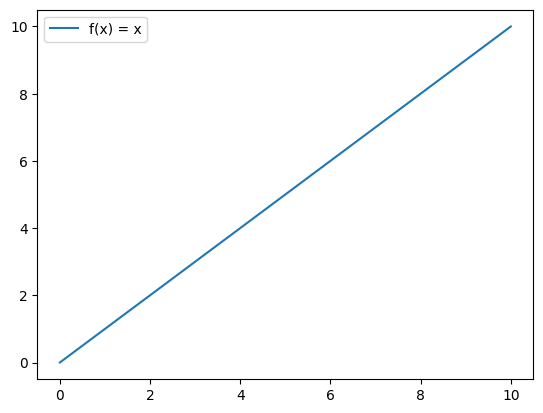

Here is the natural logarithm of x


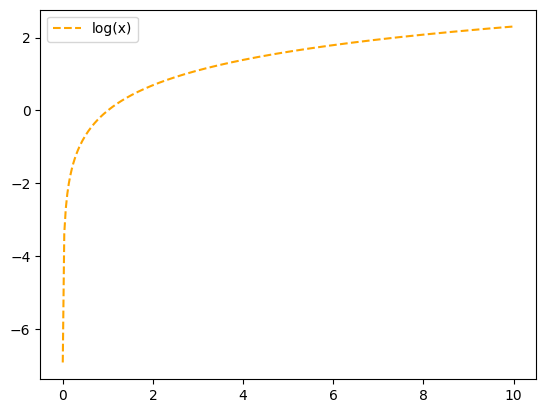


Here is the natural exponent of x


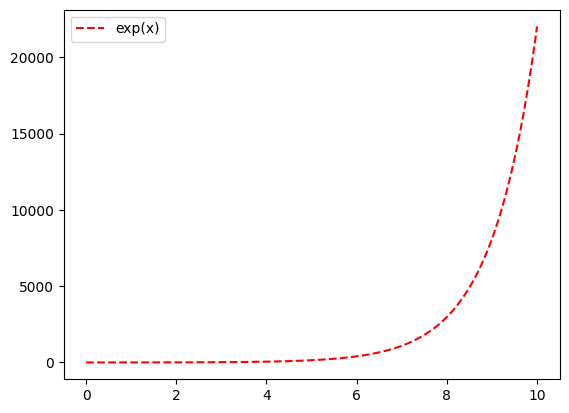


These 2 graphs llustrate how the log and exp cancel each other out, overlaping with the identity function


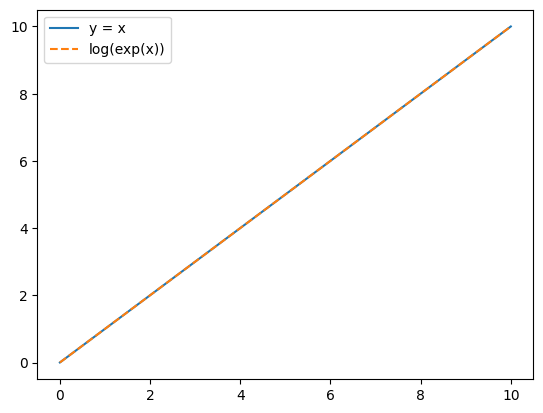

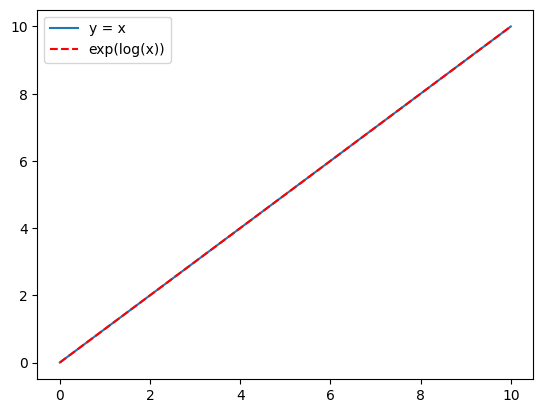

In [ ]:
#@title F(x), Log, Exp > NumPy
# merge with considerations

import numpy as np
import matplotlib.pyplot as ploti

x1 = np.linspace(.001,10,300) # 300 points, linearly separated between min .001 and max 10
logx1 = np.log(x1)
expx1 = np.exp(x1)

#ploti.rcParams.update({"font.size":15}) # use later for stylin

# Identity Function
print("\nThis graph shows identity function, where x and y are equivalent and directly proportional")

ploti.plot(x1, x1)
ploti.legend(["f(x) = x"])
ploti.show()

# Natural Logarythm
print("Here is the natural logarithm of x")
ploti.plot(x1, logx1, "orange", linestyle="--")
ploti.legend(["log(x)"])
ploti.show()

# Natural Exponent
print("\nHere is the natural exponent of x")
ploti.plot(x1, expx1, "r", linestyle="--")
ploti.legend(["exp(x)"])
ploti.show()

# Log cancels Exp
print("\nThese 2 graphs llustrate how the log and exp cancel each other out, overlaping with the identity function")
ploti.plot(x1,x1)
ploti.plot(x1, np.log(expx1), linestyle="--")
ploti.legend(["y = x", "log(exp(x))"])
ploti.show()

# Exp cancels Log
ploti.plot(x1,x1)
ploti.plot(x1, np.exp(logx1), "r", linestyle="--")
ploti.legend(["y = x", "exp(log(x))"])
ploti.show()


In [ ]:
#@title Entropy > NumPy

# Shannon Entropy
"""
Shannon Entropy describes the probability distribution
The higher the uncertainty of the outcome, the higher the entropy (across the distribution of events).
The lower the uncertainty of the outcome, the lower the entropy.
For example, if I bet on a game knowing I will win, then the entropy is minimal.
Likewise, if I bet against a game knowing I will lose, then the entropy is minimal.
However, if I bet on a game and the outcome is uncertain, then the entropy is higher.
A variable with predictable outcomes (like a loaded coin that always lands on heads) has low entropy, while a variable with many possible and equally likely outcomes (like a fair dice roll) has high entropy.
"""

# Binary Entropy
"""
Binary entropy means that there are two possible outcomes for an event. Ex: heads or tails; alive or dead.
"""

#Cross-Entropy
"""
Cross-entropy describes the relationship between two probability distributions (probability of not happening?)
"""

import numpy as np

probability = .40
improbability = 1 - probability

#chance = [.25, .75]
chance = [probability, improbability]

entro=0 # entropy

for probability in chance:
  entro += -( probability*np.log(probability) )
#happen = -( probability*np.log(probability) + (1-probability)*np.log(1-probability) ) # binary entropy

#binary cross-entropy

print("Correct entropy:", entro)

# Binary Cross Entropy

possibilities = [1, 0]
quota = [.25, .75] # probability of each outcome, like happening or not happening, cat or not cat.

entro=0
for i in range(len(possibilities)):
  entro -= possibilities[i]*np.log(quota[i])
  #entro += -( possibilities[i]*np.log(quota[i]) ) # the log is negative, so we can simply decrement (instead of incrementing) and remove the minus operation.

print("Correct entropy: " + str(entro))


Correct entropy: 0.6730116670092565
Correct entropy: 1.3862943611198906


In [ ]:
#@title Entropy > PyTorch

import torch
import torch.nn.functional as tfun

possibilities = torch.tensor([1.0, 0.0])
quota = torch.tensor([.25, .75])

tfun.binary_cross_entropy(quota,possibilities)


tensor(1.3863)

In [ ]:
#@title Min/Max > NumPy

import numpy as np

"""
Similar to native Python:
numpy.min() returns the lowest value found
numpy.max() returns the highest value found

Additionally:
numpy.argmin returns the argument (location, position or element) where the lowest value was found.
numpy.argmax returns the argument (location, position or element) where the highest value was found
"""

#probability = np.array ([1, 40, 2, -3])
arr1 = np.random.randint(-9, 10, size = 6)
print("Do you like numbers? Well, here is a bunch of random numbers. Hope you like them :)")
print(arr1)
print("\nOur targets are the biggest and the lowest numbers.")
print("Luckily, there are easy ways to find them, along with their location, without much effort.")

#np.min()
minval = np.min(arr1)
print("np.min() finds the lowest value:", minval)

#np.argmin()
minloc = np.argmin(arr1)
print(f"np.argmin() locates {arr1[minloc]} at index: {minloc}")

#np.max()
maxval = np.max(arr1)
print("np.max() finds the highest value:", maxval)

#np.argmax()
maxloc = np.argmax(arr1)
print(f"np.max() locates {arr1[maxloc]} at index: {maxloc}")

arr1 = np.random.randint(-100, 100, size=(3,3))
print("\nNow, let's experiment with a random 3x3 matrix")
print(arr1)

print("\nWe can find the highest value across the entire matrix or even across rows or columns")
maxmat = np.max(arr1)
maxrow = np.max(arr1, axis=1)
maxcol = np.max(arr1, axis=0)
print(f"The highest value in the matrix was: {maxmat}, located at index {np.argmax(arr1)}.")
print("The highest value in each row was:", maxrow)
print("The highest value in each column was:", maxcol)


Do you like numbers? Well, here is a bunch of random numbers. Hope you like them :)
[ 8 -9 -2  0  6  5]

Our targets are the biggest and the lowest numbers.
Luckily, there are easy ways to find them, along with their location, without much effort.
np.min() finds the lowest value: -9
np.argmin() locates -9 at index: 1
np.max() finds the highest value: 8
np.max() locates 8 at index: 0

Now, let's experiment with a random 3x3 matrix
[[ 59  67 -27]
 [ 38  50  97]
 [ 83 -32  13]]

We can find the highest value across the entire matrix or even across rows or columns
The highest value in the matrix was: 97, located at index 5.
The highest value in each row was: [67 97 83]
The highest value in each column was: [83 67 97]


In [ ]:
#@title Min/Max PyTorch

import torch

tvector1 = torch.randint(10, size=(1,5))
print("Here are some cupcakes.")
print(tvector1)

print("\nThey have different sizes. So let's pick the biggest one!")
print(f"The biggest one is {torch.max(tvector1)} cm high!")

tmatrix1 = torch.randint(10, size=(3,3))

print("\nHere is a fresh PyTorch matrix, freshly baked :)")
print(tmatrix1)

print("\nLet's find out what the biggest tensor pieces are :)")

tbigpieceval = torch.max(tmatrix1)
tbigpieceloc = torch.argmax(tmatrix1)
print(f"Wow! The biggest piece was {tbigpieceval}! Found at index {tbigpieceloc}")



Here are some cupcakes.
tensor([[0, 5, 6, 3, 8]])

They have different sizes. So let's pick the biggest one!
The biggest one is 8 cm high!

Here is a fresh PyTorch matrix, freshly baked :)
tensor([[1, 3, 3],
        [0, 3, 3],
        [2, 7, 4]])

Let's find out what the biggest tensor pieces are :)
Wow! The biggest piece was 7! Found at index 7


In [ ]:
#@title Min/Max Praxis > Image Prediciton
"""
In an image recognition algorithms, max() could be used to return the highest reckognized probability found and use that highest value as the answer.
In this case, the AI is presented with a picture of a cat.
After processing the picture, the AI generates a list of hypotheses of what the picture could be and the respective probability of each hypotheses, like so:
0.6 cat, 0.2 dog, 0.1 broom, 0.05 hamster, 0.05 fox.
Using the min/max functions, the highest value could be fetched and the associated labeled.
There are other ways this could work. Let's try one.
"""
hypothesis = {
    "Cat": [60],
    "Dog": [20],
    "Broom": [10],
    "Hamster": [5],
    "Fox": [5],
}

prediction = max(hypothesis, key=lambda item: max(hypothesis[item]))

i=0
while i < len(hypothesis):
  print(f"{list(hypothesis.keys())[i]}: {list(hypothesis.values())[i]}%")
  i += 1

print(f"\nThe algorithm predicts that it has been presented with an image of a {prediction.lower()}.")


Cat: [60]%
Dog: [20]%
Broom: [10]%
Hamster: [5]%
Fox: [5]%

The algorithm predicts that it has been presented with an image of a cat.


In [ ]:
#@title Min/Max Praxis > Vacation List
"""
#Let's try something else...
In this example, we want to go on vacations.
Now, I don't know about you, but I really like warm sunny beaches.
So, why not set up something that will help me decide, which beach to go?
Here, I generated a dictionary with key:value(s) pairs.
The text on the left is where the beaches are located.
The number on the left is the average temperature during Summer.
The number on the right is the average temperature during Winter.
I simply want to go to the warmest beach and will use Python to help me with that.
"""
beaches = {
    "Bahia": [16, 24],
    "Bali": [26, 24],
    "Carcavelos": [24, 9],
    "Goa": [27, 26],
    "Ostsee": [17, -1],
    "Tenerife": [25, 19]
}
print("Here is a list of locations with nice beaches, along with their average temperatures during Summer and Winter:\n")
#print(len(beaches))

i=0
while i < len(beaches):
  print(list(beaches.keys())[i], list(beaches.values())[i])
  i += 1

warmestbeach = max(beaches, key=lambda beach: max(beaches[beach]))
print(f"\nThe warmest beach is in {warmestbeach}, with temperatures: {beaches[warmestbeach]}")




Here is a list of locations with nice beaches, along with their average temperatures during Summer and Winter:

Bahia [16, 24]
Bali [26, 24]
Carcavelos [24, 9]
Goa [27, 26]
Ostsee [17, -1]
Tenerife [25, 19]

The warmest beach is in Goa, with temperatures: [27, 26]


In [ ]:
#@title Min/Max AutoEquip
"""
I also happen to like RPGs.
So, I guess you will have to bear with me and my new algorithm to decide what arms I should use on my next adventure :)
"""
# Creating nested dictionaries
arms1: dict = {
    "Daneaxe": {
        "damage": [50],
        "defense": [1],
        "twohanded": [True]
    },
    "Katana": {
        "damage": [40],
        "defense": [2],
        "twohanded": [True]
    },
    "Longbow": {
        "damage": [35],
        "defense": [0],
        "twohanded": [True]
    },
    "Dirk": {
        "damage": [5],
        "defense": [2],
        "twohanded": [False]
    },
    "Falx": {
        "damage": [6],
        "defense": [2],
        "twohanded": [False]
    },
    "Shield": {
        "damage": [1],
        "defense": [10],
        "twohanded": [False]
    }
}

print("Equipment List:")

i=0
while i < len(arms1):
  print(list(arms1.keys())[i], list(arms1.values())[i])
  i += 1

#autoequip offensive build
autoequip1 = max(arms1, key=lambda damagy: max(arms1[damagy]["damage"]))
print("\nEquipping most damaging arm:", autoequip1)

#autoequip after upgrade
arms1["Katana"]["damage"] = [55]
print("Upgrading katana...")

print("\nUpdated Equipment List:")
i=0
while i < len(arms1):
  print(list(arms1.keys())[i], list(arms1.values())[i])
  i += 1

autoequip1 = max(arms1, key=lambda attack: max(arms1[attack]["damage"]))
print("\nEquipping best offensive weapon:", autoequip1)

# autoequip defensive build
#if arms1[autoequip1]["twohanded"] == False:
#  autoequip2 = max(arms1, key=lambda defend: max(arms1[defend]["defense"]))
#  print("\nEquipping best defensive arm:", autoequip2)
#else:
#  print("Cant equip another arm with a twohanded arm. You need a free arm.")

#autoequip1 = "Dirk"
#print("Equipping:", autoequip1)
#
#if arms1[autoequip1]["twohanded"] == False:
#  autoequip2 = max(arms1, key=lambda defend: max(arms1[defend]["defense"]))
#print("\nEquipping best defensive arm:", autoequip2)




Equipment List:
Daneaxe {'damage': [50], 'defense': [1], 'twohanded': [True]}
Katana {'damage': [40], 'defense': [2], 'twohanded': [True]}
Longbow {'damage': [35], 'defense': [0], 'twohanded': [True]}
Dirk {'damage': [5], 'defense': [2], 'twohanded': [False]}
Falx {'damage': [6], 'defense': [2], 'twohanded': [False]}
Shield {'damage': [1], 'defense': [10], 'twohanded': [False]}

Equipping most damaging arm: Daneaxe
Upgrading katana...

Updated Equipment List:
Daneaxe {'damage': [50], 'defense': [1], 'twohanded': [True]}
Katana {'damage': [55], 'defense': [2], 'twohanded': [True]}
Longbow {'damage': [35], 'defense': [0], 'twohanded': [True]}
Dirk {'damage': [5], 'defense': [2], 'twohanded': [False]}
Falx {'damage': [6], 'defense': [2], 'twohanded': [False]}
Shield {'damage': [1], 'defense': [10], 'twohanded': [False]}

Equipping best offensive weapon: Katana
